In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import graphviz
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
matplotlib.rc("font", family = "Malgun Gothic")
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
df1 = pd.read_csv("lo.csv")
df1.head()

,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,...,수령인 주소,주문 시 회원등급,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호
0,무통장입금,44550.0,교환안함,0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,71450,...,경상남도 거제시 능포로 168-1 (능포동),전화주문 고객,PC쇼핑몰,20181227-0000648,2018-12-27 오후 2:54,pp683,NaN,0,71450,42602
1,무통장입금,44000.0,교환안함,0,D-20181229-0000119-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,141240,...,서울특별시 동대문구 한천로36길 16 (장안동),일반,모바일웹,20181229-0000119,2018-12-29 오후 1:22,asd0908,NaN,0,70620,42930
2,무통장입금,6820.0,교환안함,0,D-20181230-0000100-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,13910,...,세종특별자치시 호려울로 29 (보람동),NaN,모바일웹,20181230-0000100,2018-12-30 오후 3:15,NaN,NaN,0,13910,42998
3,무통장입금,49500.0,교환안함,0,D-20181231-0000087-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,81600,...,부산광역시 부산진구 가야대로 482 (개금동),일반,모바일웹,20181231-0000087,2018-12-31 오전 10:30,23533593@n,NaN,0,81600,43063
4,무통장입금,61600.0,교환안함,0,D-20181231-0000108-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,94710,...,부산광역시 해운대구 선수촌로 104-21 (반여동),사업자,모바일웹,20181231-0000108,2018-12-31 오전 10:43,romandoll,NaN,0,94710,43066


In [1]:
df2 = pd.read_csv("mm.csv")
df2.head()

NameError: name 'pd' is not defined

In [4]:
df3 = pd.read_csv("mp.csv")
df3.head()

,#,공급사,과세/면세,담기,매입가,상품명(기본),상품코드,재입고알림,제조사,카테고리,판매가,품절여부,후기
0,1,패커스,과세,0,55440,"실링용기 71호 백색 2,200ml 400개 1박스",2184,사용함,자체제작,018 : 실링용기\n018002 : 실링용기 > 2319(2318)시리즈\n042...,77480,정상,0
1,2,(주)니드코,과세,0,3080,"니드코]국산제품 정식쟁반,병원식판,분식점 돈까스쟁반 업소용 화이트 항균아트쟁반 5호",2181,사용안함,(주)니드코,002 : 주방용품\n002002 : 주방용품 > 주방용품\n046 : 주방용품/소...,4950,정상,0
2,3,(주)니드코,과세,10,1120,"니드코]QueenRose 장미 밥공기그릇 /중국집,주방,식당,가정용 깨지지 않는 단...",2180,사용함,(주)니드코,002 : 주방용품\n002002 : 주방용품 > 주방용품\n046 : 주방용품/소...,1800,정상,0
3,4,(주)니드코,과세,0,5600,니드코 터치미 종이컵디스펜서(자석형) 종이컵보관함,2179,사용안함,(주)니드코,002 : 주방용품\n002002 : 주방용품 > 주방용품\n046 : 주방용품/소...,9000,정상,0
4,5,(주)니드코,과세,0,42000,니드코 뉴카멜리아 사각수저함(수저통),2178,사용안함,(주)니드코,002 : 주방용품\n002002 : 주방용품 > 주방용품\n046 : 주방용품/소...,65000,정상,0


In [8]:
df1.isnull().sum()

결제수단              0
공급원가             88
교환구분              0
네이버 포인트           0
배송번호              0
배송비 정보            0
배송시작일             0
배송완료일             0
사용한 적립금액          0
상품구매금액            0
상품명              88
상품번호             88
상품별 추가할인금액        0
수량                0
수령인 주소            8
주문 시 회원등급      3105
주문경로              0
주문번호              0
주문일시              0
주문자ID          3105
카드사           30138
쿠폰 할인금액           0
판매가               0
품목번호              0
dtype: int64

In [14]:
df2.isnull().sum()

ID              0
나이              0
사용가능 적립금        0
성별              0
주소(동/읍/면)     634
최종접속일          52
최종주문일        1422
유입경로            0
유입기기            0
회원 가입일          0
사업자구분           0
회원구분            0
dtype: int64

In [15]:
df3.isnull().sum()

#            0
공급사          0
과세/면세        0
담기           0
매입가          0
상품명(기본)      0
상품코드         0
재입고알림        0
제조사        486
카테고리         0
판매가          0
품절여부         0
후기           0
dtype: int64

<AxesSubplot:>

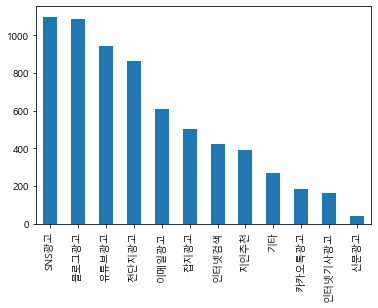

In [8]:
df2_count = df2.groupby(["유입경로"]).size()
df2_count.plot.pie(autopct = "%.1f%%")

<AxesSubplot:>

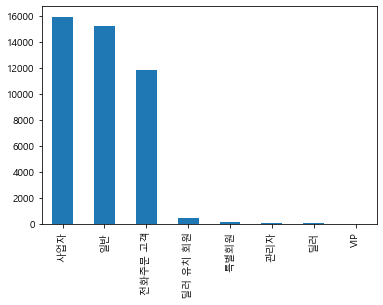

In [9]:
df1_count = df1["주문 시 회원등급"].value_counts()
df1_count.plot.bar()

<AxesSubplot:>

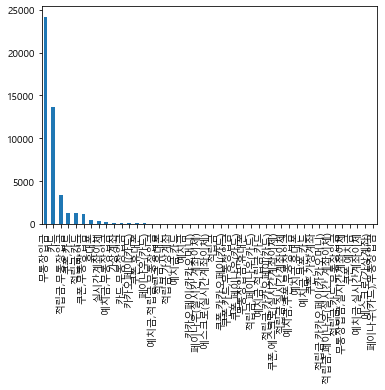

In [10]:
df1_count = df1["결제수단"].value_counts()
df1_count.plot.bar()

AttributeError: 'Rectangle' object has no property 'autopct'

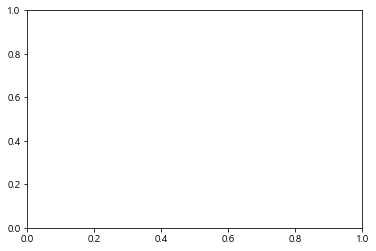

In [13]:
df1_count = df1.groupby(["결제수단"]).size()
df1_count.plot.bar(y = "상품구매금액",  autopct = "%.1f%%")

<AxesSubplot:ylabel='None'>

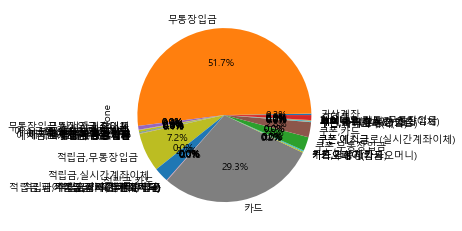

In [12]:
df1_count = df1.groupby(["결제수단"]).size()
df1_count.plot.pie(y = "수량",  autopct = "%.1f%%")

<AxesSubplot:ylabel='None'>

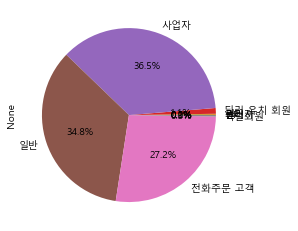

In [6]:
df1_count = df1.groupby(["주문 시 회원등급"]).size()
df1_count.plot.pie(y = "상품구매금액",  autopct = "%.1f%%")

<AxesSubplot:ylabel='None'>

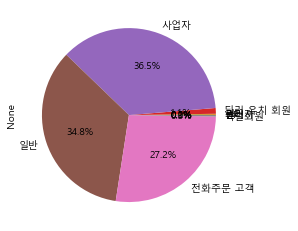

In [7]:
df1_count = df1.groupby(["주문 시 회원등급"]).size()
df1_count.plot.pie(y = "수량",  autopct = "%.1f%%")

In [ ]:
n_df1_count = n_df1.groupby(["주문 시 회원등급"]).size()
n_df1_count.plot.pie(y = "",  autopct = "%.1f%%")

In [9]:
df2.isnull().sum()

ID              0
나이              0
사용가능 적립금        0
성별              0
주소(동/읍/면)     634
최종접속일          52
최종주문일        1422
유입경로            0
유입기기            0
회원 가입일          0
사업자구분           0
회원구분            0
dtype: int64

In [10]:
df3.isnull().sum()

#            0
공급사          0
과세/면세        0
담기           0
매입가          0
상품명(기본)      0
상품코드         0
재입고알림        0
제조사        486
카테고리         0
판매가          0
품절여부         0
후기           0
dtype: int64

In [12]:
df1.shape

(46749, 24)

In [14]:
df2.shape

(6575, 12)

In [15]:
df3.shape

(1020, 13)

In [18]:
df3["공급사"]

0          패커스
1       (주)니드코
2       (주)니드코
3       (주)니드코
4       (주)니드코
         ...  
1015       패커스
1016       패커스
1017       패커스
1018       패커스
1019       패커스
Name: 공급사, Length: 1020, dtype: object

In [19]:
df3["담기"]

0        0
1        0
2       10
3        0
4        0
        ..
1015    23
1016     1
1017     4
1018     6
1019    17
Name: 담기, Length: 1020, dtype: int64

In [21]:
n_df3 = df3[["담기", "공급사", "재입고알림", "제조사", "후기"]]

<AxesSubplot:>

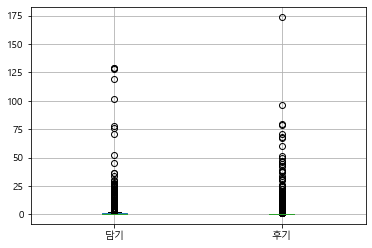

In [22]:
n_df3.boxplot()

In [24]:
n_df2 = df2[["주소(동/읍/면)", "유입경로", "회원구분", "사업자구분"]]
n_df2.head()

,주소(동/읍/면),유입경로,회원구분,사업자구분
0,경기도 평택시 현신3길 76 (용이동),블로그광고,일반,개인
1,전라북도 전주시 덕진구 동부대로 879 (호성동1가),블로그광고,일반,개인
2,전라북도 전주시 완산구 효자동3가 1676-13,이메일광고,사업자,사업자
3,충청남도 아산시 용화고길 46 (용화동),블로그광고,사업자,사업자
4,경기도 부천시 원미구 상일로 126 (상동),SNS광고,사업자,사업자


In [25]:
df1.isnull().sum()

결제수단              0
공급원가             88
교환구분              0
네이버 포인트           0
배송번호              0
배송비 정보            0
배송시작일             0
배송완료일             0
사용한 적립금액          0
상품구매금액            0
상품명              88
상품번호             88
상품별 추가할인금액        0
수량                0
수령인 주소            8
주문 시 회원등급      3105
주문경로              0
주문번호              0
주문일시              0
주문자ID          3105
카드사           30138
쿠폰 할인금액           0
판매가               0
품목번호              0
dtype: int64

In [48]:
n_df1 = df1[["교환구분", "배송비 정보", "배송시작일", "배송완료일", "상품구매금액", "상품명", "상품번호", "수량", "수령인 주소", "주문경로", "주문일시", "주문 시 회원등급"]]
n_df1.head()

,교환구분,배송비 정보,배송시작일,배송완료일,상품구매금액,상품명,상품번호,수량,수령인 주소,주문경로,주문일시,주문 시 회원등급
0,교환안함,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,195파이 탕용기 소 300개 1set(2박스),1077.0,1,경상남도 거제시 능포로 168-1 (능포동),PC쇼핑몰,2018-12-27 오후 2:54,전화주문 고객
1,교환안함,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",42.0,2,서울특별시 동대문구 한천로36길 16 (장안동),모바일웹,2018-12-29 오후 1:22,일반
2,교환안함,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,13910,비닐봉투 배달중 중 백색 200개,1271.0,1,세종특별자치시 호려울로 29 (보람동),모바일웹,2018-12-30 오후 3:15,NaN
3,교환안함,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,81600,195파이 미니탕용기 투톤 300개 1set(2박스),1085.0,1,부산광역시 부산진구 가야대로 482 (개금동),모바일웹,2018-12-31 오전 10:30,일반
4,교환안함,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,94710,250파이 원형 접시 미니 블랙 400개 1박스,1106.0,1,부산광역시 해운대구 선수촌로 104-21 (반여동),모바일웹,2018-12-31 오전 10:43,사업자


In [27]:
n_df1.isnull().sum()

교환구분       0
배송비 정보     0
배송시작일      0
배송완료일      0
상품구매금액     0
상품명       88
상품번호      88
수량         0
수령인 주소     8
주문경로       0
주문일시       0
dtype: int64

In [28]:
n_df2.isnull().sum()

주소(동/읍/면)    634
유입경로           0
회원구분           0
사업자구분          0
dtype: int64

In [29]:
n_df3.isnull().sum()

담기         0
공급사        0
재입고알림      0
제조사      486
후기         0
dtype: int64

In [ ]:
sns.pairplot()

<AxesSubplot:>

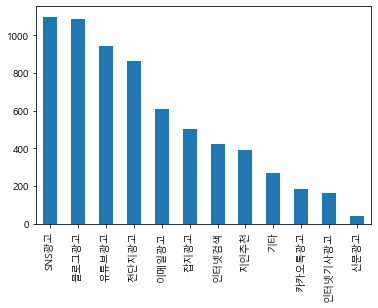

In [53]:

n_df2_count = n_df2["유입경로"].value_counts()
n_df2_count.plot.bar()

<AxesSubplot:>

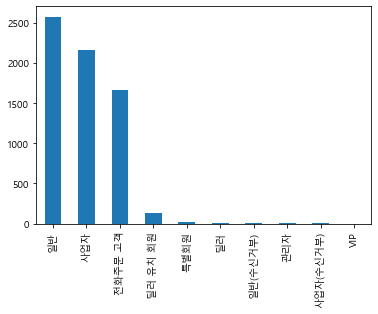

In [54]:

n_df2_count = n_df2["회원구분"].value_counts()
n_df2_count.plot.bar()

<AxesSubplot:>

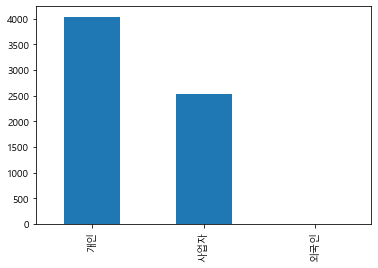

In [55]:
#생존여부 파악
n_df3_count = n_df3["사업자구분"].value_counts()
n_df3_count.plot.bar()

<AxesSubplot:>

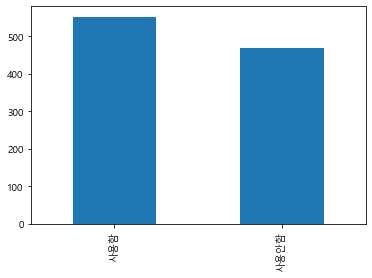

In [62]:
#생존여부 파악
n_df3_count = n_df3["재입고알림"].value_counts()
n_df3_count.plot.bar()

<AxesSubplot:>

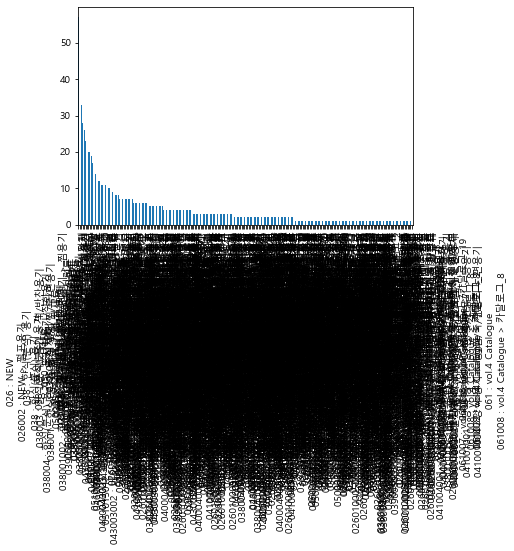

In [63]:
n_df3_count = df3["카테고리"].value_counts()
n_df3_count.plot.bar()

<AxesSubplot:ylabel='배송비 정보'>

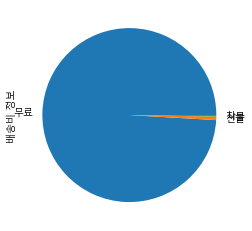

In [45]:
n_df1_count = n_df1["배송비 정보"].value_counts()
n_df1_count.plot.pie()

<AxesSubplot:ylabel='None'>

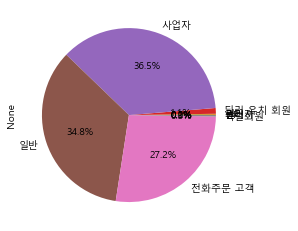

In [50]:
n_df1_count = n_df1.groupby(["주문 시 회원등급"]).size()
n_df1_count.plot.pie(y = "",  autopct = "%.1f%%")

<AxesSubplot:>

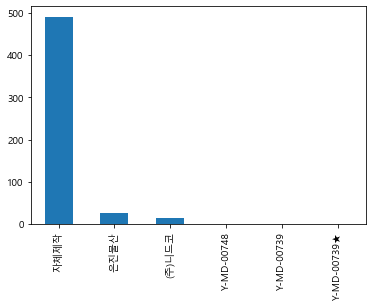

In [58]:
n_df3_count = n_df3["제조사"].value_counts()
n_df3_count.plot.bar()

In [ ]:
#남성의 죽은 비율이 현저히 높다
df_groupby_total = df_titanic.groupby(["Survived", "Sex"], as_index = False).size()
df_groupby_total.plot.bar()

In [ ]:
#성별과 클래스에 따른 비율
df_count = df_titanic.groupby(["Pclass", "Sex"]).size()
df_count.plot.pie(y = "Survived", autopct = "%.1f%%")

In [40]:
n_df1.corr().round(3)

,상품구매금액,상품번호,수량
상품구매금액,1.000,-0.089,0.656
상품번호,-0.089,1.000,0.023
수량,0.656,0.023,1.000


In [41]:
df1.corr().round(3)

,공급원가,네이버 포인트,사용한 적립금액,상품구매금액,상품번호,상품별 추가할인금액,수량,쿠폰 할인금액,판매가,품목번호
공급원가,1.000,0.009,0.013,0.633,-0.164,0.386,0.013,0.009,0.942,0.159
네이버 포인트,0.009,1.000,-0.006,0.006,-0.012,-0.005,0.001,-0.003,0.007,0.016
사용한 적립금액,0.013,-0.006,1.000,0.052,0.036,0.035,0.053,-0.027,0.015,0.038
상품구매금액,0.633,0.006,0.052,1.000,-0.089,0.726,0.656,0.019,0.679,0.096
상품번호,-0.164,-0.012,0.036,-0.089,1.000,-0.057,0.023,0.018,-0.156,0.266
상품별 추가할인금액,0.386,-0.005,0.035,0.726,-0.057,1.000,0.471,0.016,0.509,-0.241
수량,0.013,0.001,0.053,0.656,0.023,0.471,1.000,0.010,0.031,0.043
쿠폰 할인금액,0.009,-0.003,-0.027,0.019,0.018,0.016,0.010,1.000,0.015,-0.042
판매가,0.942,0.007,0.015,0.679,-0.156,0.509,0.031,0.015,1.000,0.126
품목번호,0.159,0.016,0.038,0.096,0.266,-0.241,0.043,-0.042,0.126,1.000


In [42]:
df2.corr().round(3)

,나이,사용가능 적립금
나이,1.000,0.053
사용가능 적립금,0.053,1.000


In [43]:
df3.corr().round(3)

,#,담기,매입가,상품코드,판매가,후기
#,1.000,0.229,0.296,-0.939,0.365,0.302
담기,0.229,1.000,0.029,-0.209,0.040,0.782
매입가,0.296,0.029,1.000,-0.278,0.987,0.056
상품코드,-0.939,-0.209,-0.278,1.000,-0.339,-0.343
판매가,0.365,0.040,0.987,-0.339,1.000,0.064
후기,0.302,0.782,0.056,-0.343,0.064,1.000
